In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import config

In [38]:
df = pd.DataFrame()

dfAux = pd.read_csv('./dummy/dfPredictions.csv')
dfAux['error_dummy'] = abs(dfAux['Predict'] - dfAux['Real'])
dfAux.rename(columns={'Predict': f'Predict_dummy', 'Real': f'Real_dummy'}, inplace=True)
del dfAux['Model']
dfAux.set_index(['LastTimeWithData', 'ti', 'Time'], inplace=True)
print(dfAux.shape)
df = pd.concat([df, dfAux], axis=1, join='outer')

dfAux = pd.read_csv('./avg/dfPredictions.csv')
dfAux['error_avg'] = abs(dfAux['Predict'] - dfAux['Real'])
dfAux.rename(columns={'Predict': f'Predict_avg', 'Real': f'Real_avg'}, inplace=True)
dfAux.set_index(['LastTimeWithData', 'ti', 'Time'], inplace=True)
del dfAux['Model']
print(dfAux.shape)
df = pd.concat([df, dfAux], axis=1, join='outer')

dfAux = pd.read_csv('./rnn/dfPredictions.csv')
dfAux['error_rnn'] = abs(dfAux['Predict'] - dfAux['Real'])
dfAux.rename(columns={'Predict': f'Predict_rnn', 'Real': f'Real_rnn'}, inplace=True)
del dfAux['Model']
dfAux.set_index(['LastTimeWithData', 'ti', 'Time'], inplace=True)
print(dfAux.shape)
df = pd.concat([df, dfAux], axis=1, join='outer')

dfAux = pd.read_csv('./rnn_changes/dfPredictions.csv')
dfAux['error_rnn_changes'] = abs(dfAux['Predict'] - dfAux['Real'])
dfAux.rename(columns={'Predict': f'Predict_rnn_changes', 'Real': f'Real_rnn_changes'}, inplace=True)
del dfAux['Model']
dfAux.set_index(['LastTimeWithData', 'ti', 'Time'], inplace=True)
print(dfAux.shape)
df = pd.concat([df, dfAux], axis=1, join='outer')

dfAux = pd.read_csv('./rnn_by_time/dfPredictions.csv')
dfAux['error_rnn_by_time'] = abs(dfAux['Predict'] - dfAux['Real'])
dfAux.rename(columns={'Predict': f'Predict_rnn_by_time', 'Real': f'Real_rnn_by_time'}, inplace=True)
del dfAux['Model']
dfAux.set_index(['LastTimeWithData', 'ti', 'Time'], inplace=True)
print(dfAux.shape)
df = pd.concat([df, dfAux], axis=1, join='outer')



(2007, 3)
(2007, 3)
(2007, 3)
(2007, 3)
(2007, 3)


In [39]:
print ("Must be empty")
df[df[['Real_dummy', 'Real_avg', 'Real_rnn', 'Real_rnn_changes', 'Real_rnn_by_time']].nunique(axis=1) > 1]

Must be empty


,,,Predict_dummy,Real_dummy,error_dummy,Predict_avg,Real_avg,error_avg,Predict_rnn,Real_rnn,error_rnn,Predict_rnn_changes,Real_rnn_changes,error_rnn_changes,Predict_rnn_by_time,Real_rnn_by_time,error_rnn_by_time
LastTimeWithData,ti,Time,,,,,,,,,,,,,,,


In [40]:
df['Real'] = df['Real_dummy'] 
df.drop(columns=['Real_dummy', 'Real_avg', 'Real_rnn', 'Real_rnn_changes', 'Real_rnn_by_time'], inplace=True)


In [41]:
df = df.reset_index()
df['LastTimeWithData'] = pd.to_datetime(df['LastTimeWithData'])
df['Time'] = pd.to_datetime(df['Time'])
df = df.sort_values(by=['LastTimeWithData', 'Time'])

In [42]:
df

,LastTimeWithData,ti,Time,Predict_dummy,error_dummy,Predict_avg,error_avg,Predict_rnn,error_rnn,Predict_rnn_changes,error_rnn_changes,Predict_rnn_by_time,error_rnn_by_time,Real
0,2023-11-17 12:30:00,1,2023-11-17 13:00:00,0.0,2.0,1.666667,0.333333,0.778212,1.221788,-0.194817,2.194817,0.641881,1.358119,2.0
2,2023-11-17 12:30:00,2,2023-11-17 13:30:00,0.0,2.0,0.777778,1.222222,0.887146,1.112854,-0.163819,2.163819,1.113986,0.886014,2.0
5,2023-11-17 12:30:00,3,2023-11-17 14:00:00,0.0,6.0,0.574074,5.425926,1.076222,4.923778,0.048284,5.951716,1.762096,4.237904,6.0
9,2023-11-17 12:30:00,4,2023-11-17 14:30:00,0.0,8.0,0.503086,7.496914,1.311916,6.688084,0.389561,7.610439,1.962343,6.037657,8.0
14,2023-11-17 12:30:00,5,2023-11-17 15:00:00,0.0,0.0,0.420267,0.420267,1.582048,1.582048,0.753336,0.753336,2.000304,2.000304,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2023-11-24 11:30:00,2,2023-11-24 12:30:00,2.0,1.0,0.500000,2.500000,2.539800,0.460200,2.301347,0.698653,3.355421,0.355421,3.0
2003,2023-11-24 11:30:00,3,2023-11-24 13:00:00,2.0,5.0,0.416667,6.583333,2.808741,4.191259,2.414033,4.585967,3.812286,3.187714,7.0
1995,2023-11-24 12:00:00,1,2023-11-24 12:30:00,4.0,1.0,1.500000,1.500000,4.159387,1.159387,4.088219,1.088219,4.853888,1.853888,3.0
2002,2023-11-24 12:00:00,2,2023-11-24 13:00:00,4.0,3.0,1.583333,5.416667,4.492601,2.507399,4.354837,2.645163,5.260686,1.739314,7.0


In [43]:
df.groupby(['ti']).agg({
    'error_dummy': 'sum',
    'error_avg': 'sum',
    'error_rnn': 'sum',
    'error_rnn_changes': 'sum',
    'error_rnn_by_time': 'sum'
}).reset_index()

,ti,error_dummy,error_avg,error_rnn,error_rnn_changes,error_rnn_by_time
0,1,473.0,722.500000,486.019405,487.060975,471.496767
1,2,648.0,819.388889,648.626156,671.831405,591.389911
2,3,778.0,916.847222,778.520037,818.651550,670.350696
3,4,886.0,1005.087191,849.976329,933.197639,676.869008
4,5,985.0,1088.148020,937.326265,1043.793756,730.039816
5,6,1094.0,1180.458033,997.640257,1157.831002,747.419804


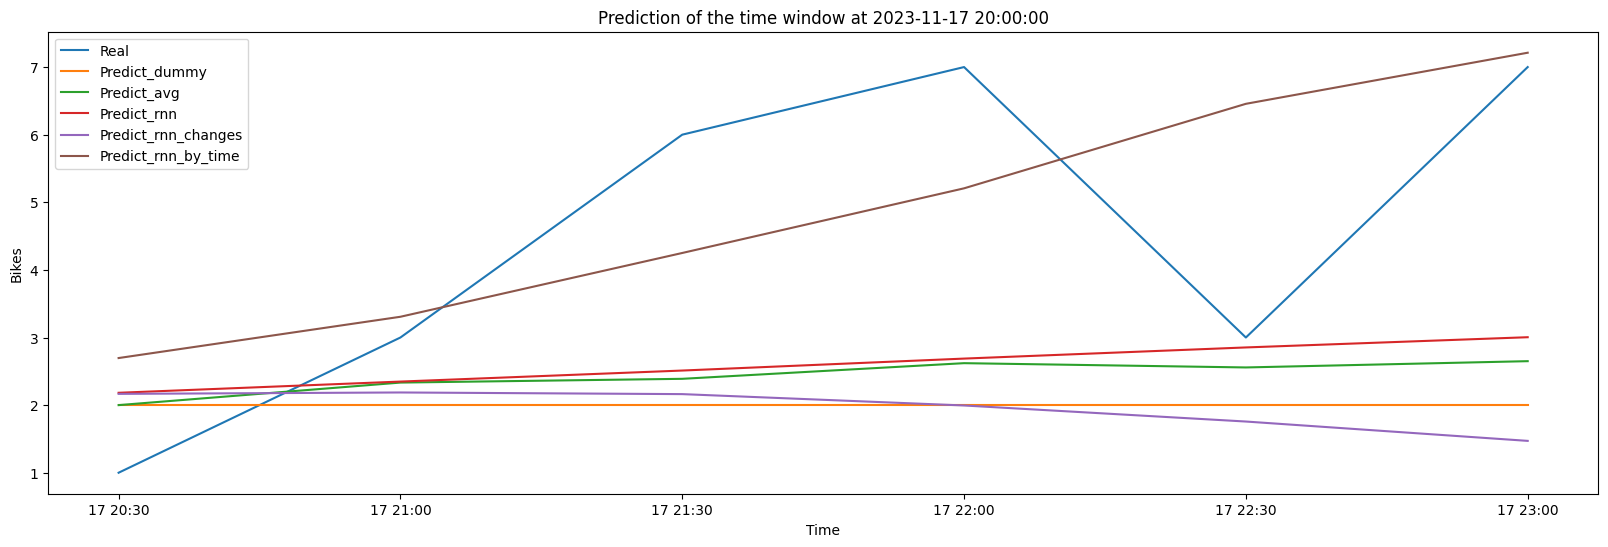

In [55]:
dt = datetime(2023, 11, 17, 20, 0, 0)
name_model = 'Dummy'
dfPlot = df[df['LastTimeWithData']==dt]

plt.figure(figsize=(20, 6))
plt.plot(dfPlot['Time'], dfPlot['Real'], label='Real')
plt.plot(dfPlot['Time'], dfPlot['Predict_dummy'], label='Predict_dummy')
plt.plot(dfPlot['Time'], dfPlot['Predict_avg'], label='Predict_avg')
plt.plot(dfPlot['Time'], dfPlot['Predict_rnn'], label='Predict_rnn')
plt.plot(dfPlot['Time'], dfPlot['Predict_rnn_changes'], label='Predict_rnn_changes')
plt.plot(dfPlot['Time'], dfPlot['Predict_rnn_by_time'], label='Predict_rnn_by_time')

plt.title(f'Prediction of the time window at {dt}')
plt.xlabel('Time')
plt.ylabel('Bikes')

plt.legend()
plt.show()

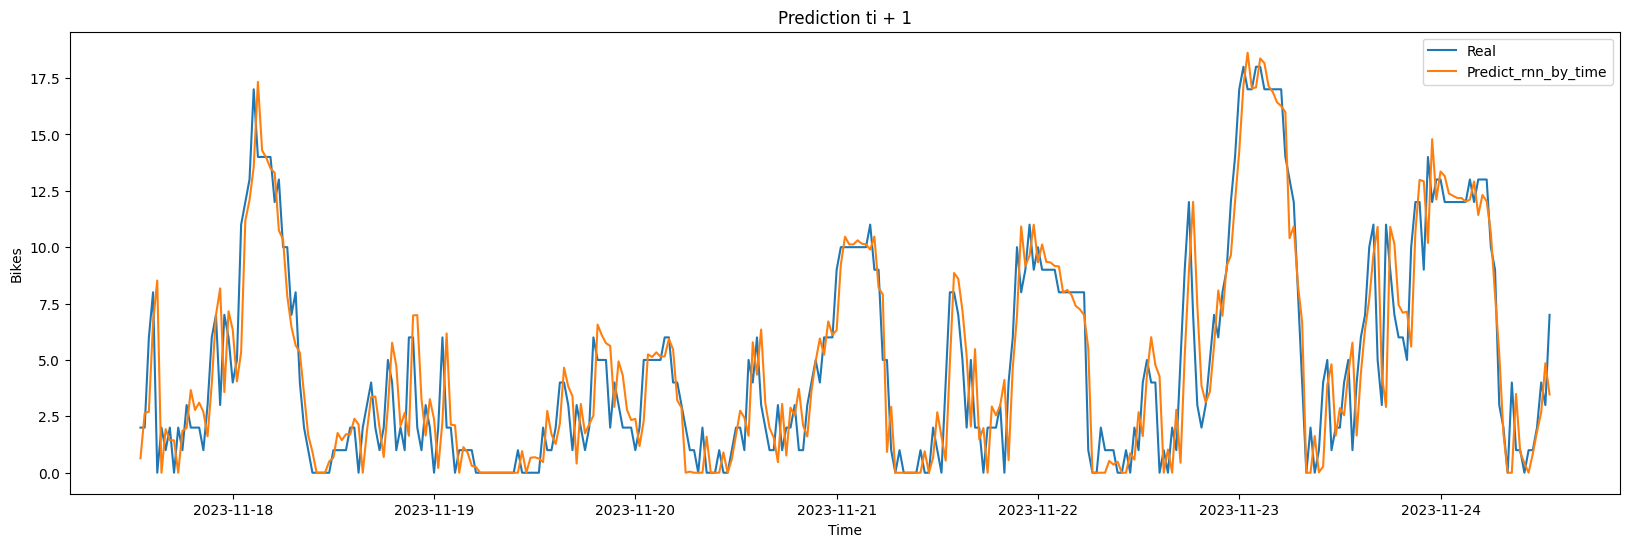

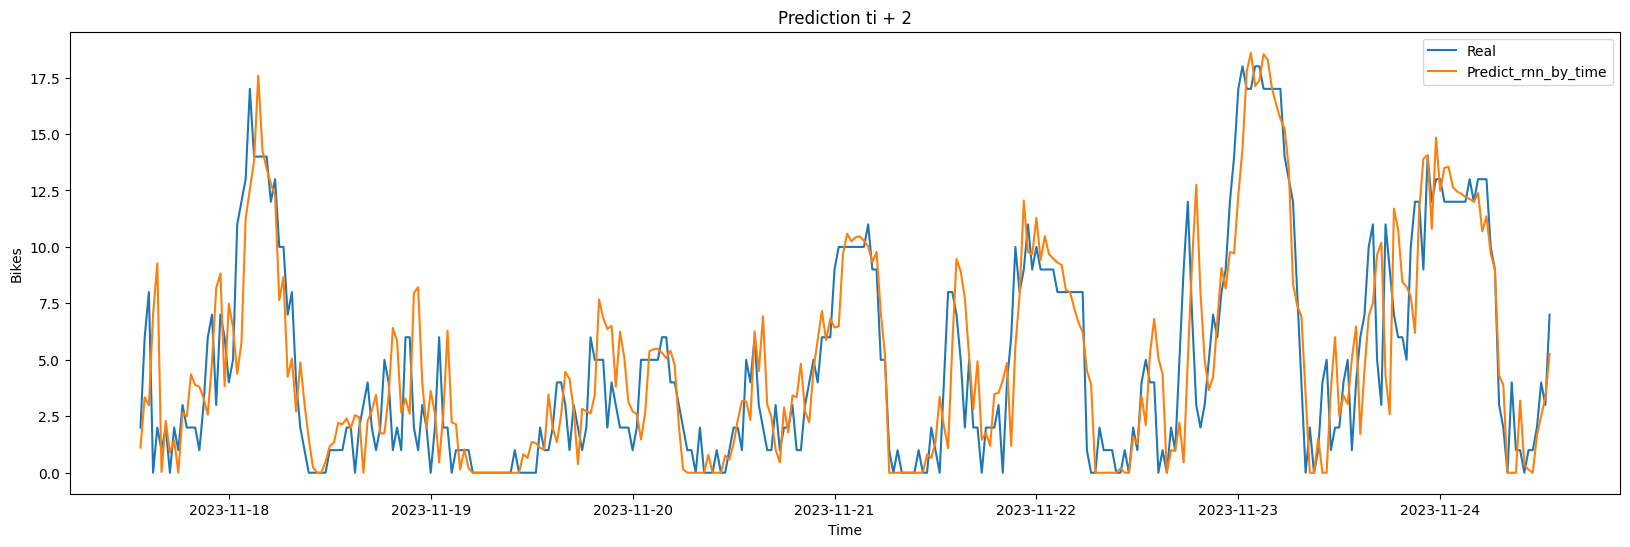

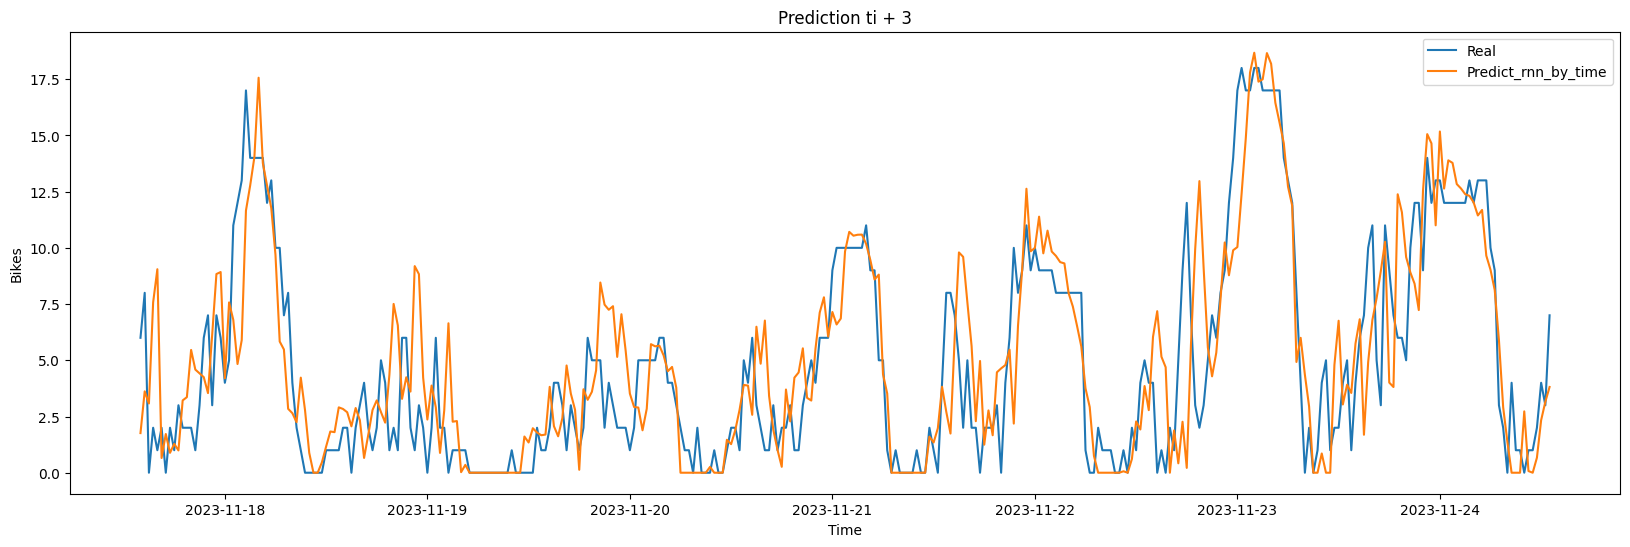

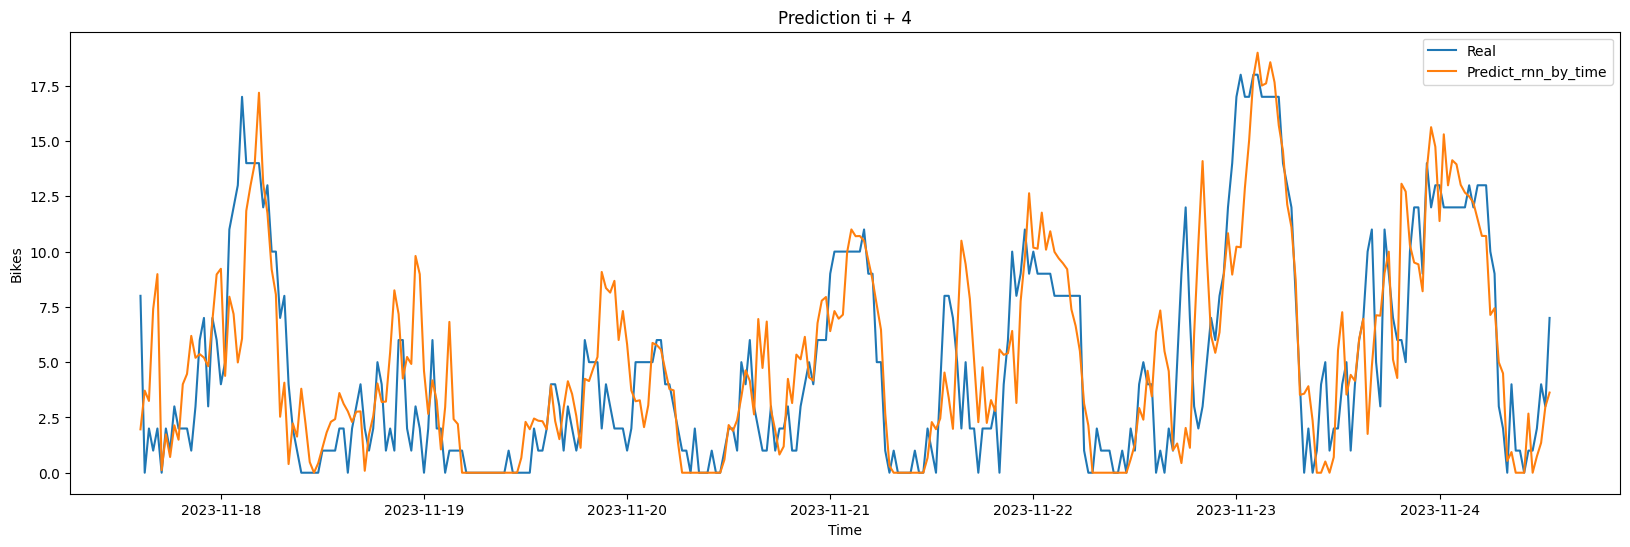

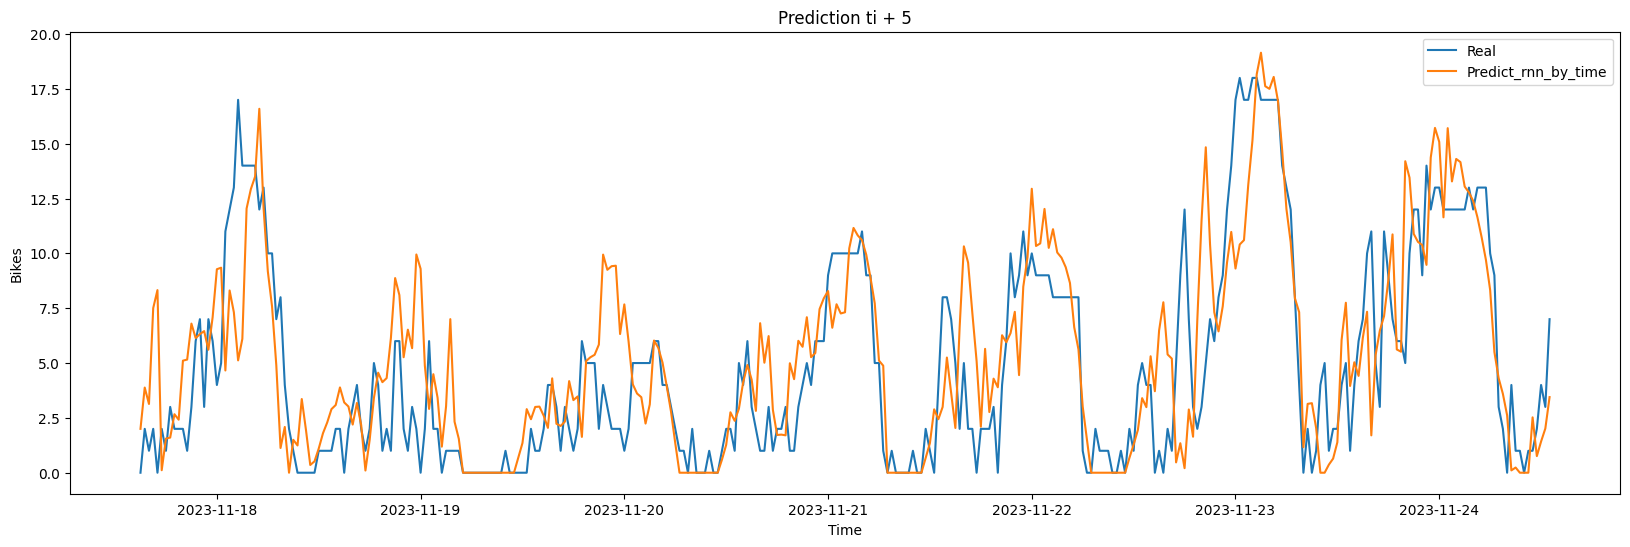

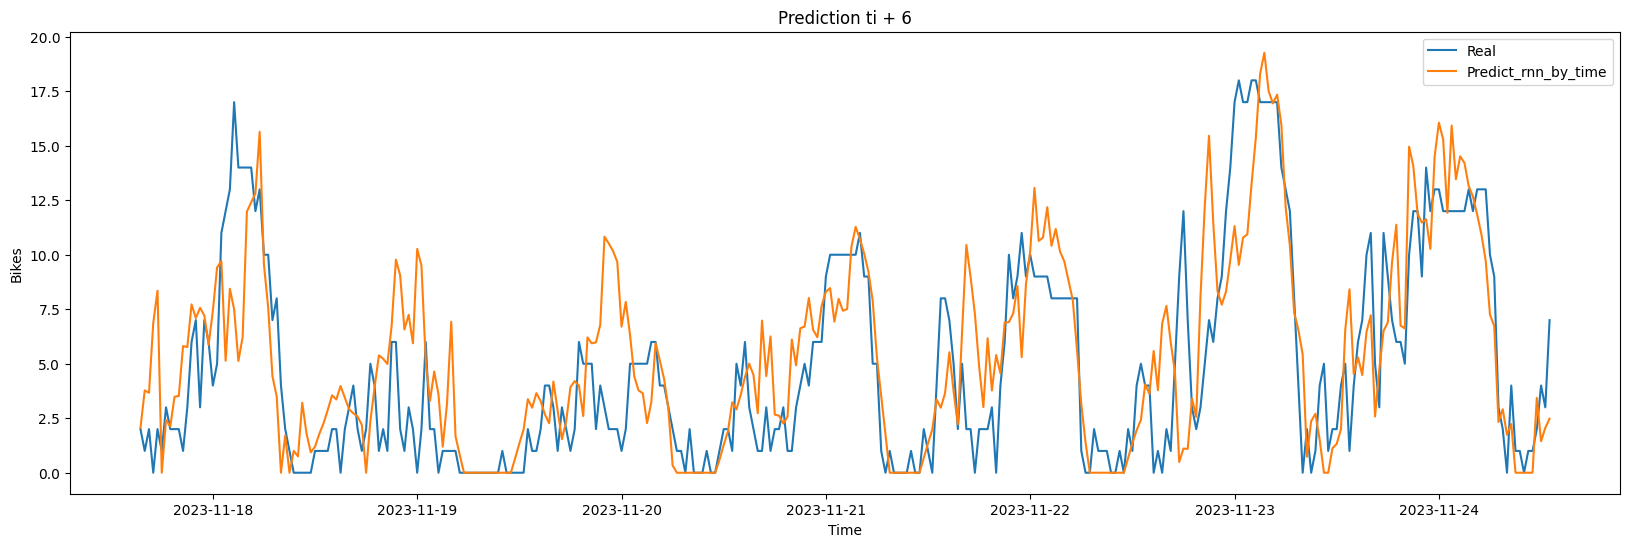

In [58]:

for ti in range(1, config.prediction_window + 1):
    dfPlot = df[df['ti'] == ti]

    plt.figure(figsize=(20, 6))
    plt.plot(dfPlot['Time'], dfPlot['Real'], label='Real')
    plt.plot(dfPlot['Time'], dfPlot['Predict_dummy'], label='Predict_dummy')
    plt.plot(dfPlot['Time'], dfPlot['Predict_avg'], label='Predict_avg')
    plt.plot(dfPlot['Time'], dfPlot['Predict_rnn'], label='Predict_rnn')
    plt.plot(dfPlot['Time'], dfPlot['Predict_rnn_changes'], label='Predict_rnn_changes')
    plt.plot(dfPlot['Time'], dfPlot['Predict_rnn_by_time'], label='Predict_rnn_by_time')

    plt.title(f'Prediction at: ti + {ti}')
    plt.xlabel('Time')
    plt.ylabel('Bikes')
    
    plt.legend()
    plt.show()


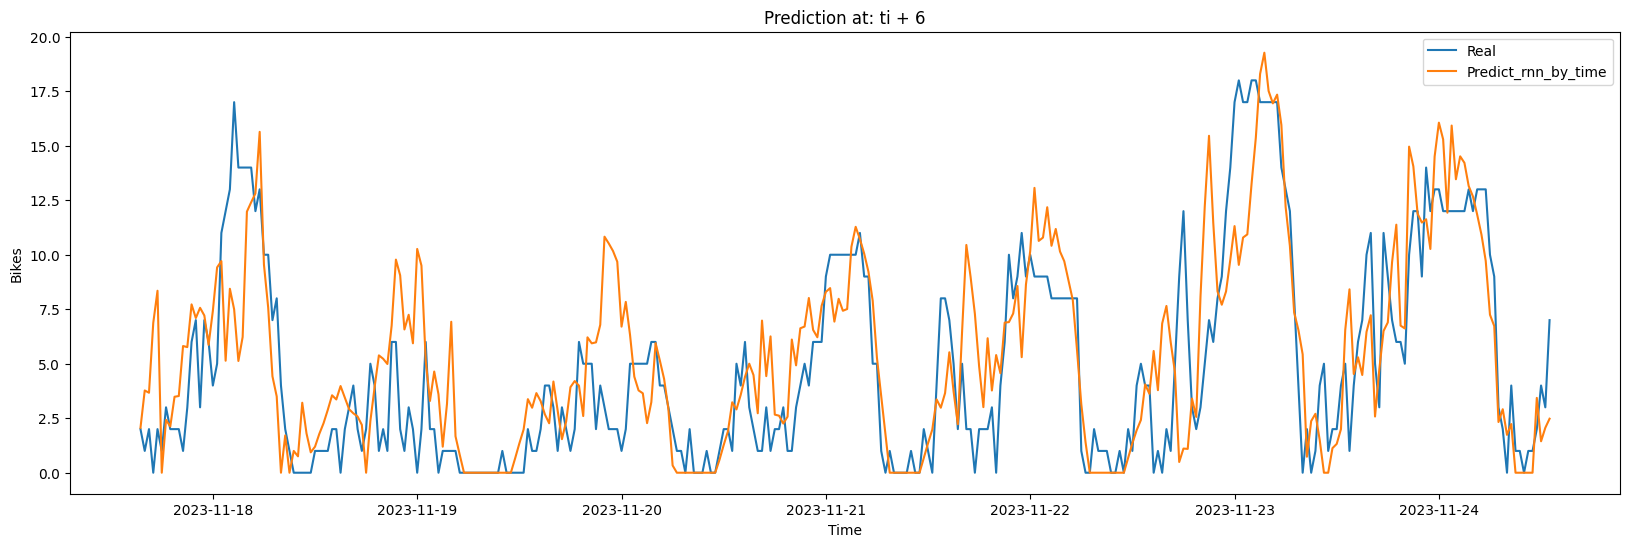

In [63]:
ti = 6
dfPlot = df[df['ti'] == ti]

plt.figure(figsize=(20, 6))
plt.plot(dfPlot['Time'], dfPlot['Real'], label='Real')
plt.plot(dfPlot['Time'], dfPlot['Predict_rnn_by_time'], label='Predict_rnn_by_time')

plt.title(f'Prediction at: ti + {ti}')
plt.xlabel('Time')
plt.ylabel('Bikes')

plt.legend()
plt.show()
